
### 🧩 Step 1: Load the Dataset  
We begin by importing the `pandas` library and loading our dataset, `home_prices.csv`, into a DataFrame called `df`.  
The `.head()` method displays the first few rows so we can inspect the structure and ensure the file loaded correctly.


In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("home_prices.csv")

# Display first few rows
df.head()


,area_sqr_ft,bedrooms,color,price_lakhs
0,3774,2,Red,216
1,1460,3,Gray,88
2,1894,4,Gray,147
3,1730,2,Blue,84
4,1695,1,Blue,77



### 🧩 Step 2: Inspect Categorical Data  
Before encoding, we check all unique values in the `color` column.  
This helps us understand the different categories that exist, which is important when creating dummy variables.


In [2]:

# Check unique values in the 'color' column
df['color'].unique()


array(['Red', 'Gray', 'Blue', 'Yellow', 'Green', 'White'], dtype=object)


### 🧩 Step 3: Handle Missing Values (if any)  
It's a good practice to check for and handle missing values before performing encoding or correlation analysis.  
Here we print the count of null values in each column and fill them with appropriate replacements if needed.


In [4]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Example fix: Fill missing numerical values with median and categorical with mode
# Use assignment to avoid chained-assignment / inplace FutureWarning in pandas
for col in df.columns:
    if df[col].dtype == 'object':
        # use assignment on the DataFrame column
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


Missing values per column:
 area_sqr_ft    0
bedrooms       0
color          0
price_lakhs    0
dtype: int64



### 🧩 Step 4: One-Hot Encode Categorical Variables  
We use `pd.get_dummies()` to convert the categorical column `color` into binary (dummy) columns.  
Setting `drop_first=True` avoids multicollinearity by dropping the first dummy column.


In [5]:

# One-hot encode 'color' column
df_encoded = pd.get_dummies(df, columns=['color'], drop_first=True)

# Display first few rows of encoded data
df_encoded.head()


,area_sqr_ft,bedrooms,price_lakhs,color_Gray,color_Green,color_Red,color_White,color_Yellow
0,3774,2,216,False,False,True,False,False
1,1460,3,88,True,False,False,False,False
2,1894,4,147,True,False,False,False,False
3,1730,2,84,False,False,False,False,False
4,1695,1,77,False,False,False,False,False



### 🧩 Step 5: Compute Correlation Matrix  
We calculate the correlation matrix to understand the relationships between numeric features.  
This helps identify which features are strongly correlated with the target variable, aiding feature selection.


In [6]:

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Display top correlated features
corr_matrix


,area_sqr_ft,bedrooms,price_lakhs,color_Gray,color_Green,color_Red,color_White,color_Yellow
area_sqr_ft,1.000000,0.185810,0.945365,-0.068944,-0.032012,0.059055,0.063827,-0.037819
bedrooms,0.185810,1.000000,0.439445,0.040882,-0.120207,-0.004177,-0.023676,0.015286
price_lakhs,0.945365,0.439445,1.000000,-0.040565,-0.041959,0.045803,0.051122,-0.046673
color_Gray,-0.068944,0.040882,-0.040565,1.000000,-0.214409,-0.230990,-0.205931,-0.217205
color_Green,-0.032012,-0.120207,-0.041959,-0.214409,1.000000,-0.190117,-0.169493,-0.178771
color_Red,0.059055,-0.004177,0.045803,-0.230990,-0.190117,1.000000,-0.182600,-0.192596
color_White,0.063827,-0.023676,0.051122,-0.205931,-0.169493,-0.182600,1.000000,-0.171703
color_Yellow,-0.037819,0.015286,-0.046673,-0.217205,-0.178771,-0.192596,-0.171703,1.000000



### 🧩 Step 6: Visualize Correlation Heatmap  
A heatmap provides a visual understanding of feature correlations.  
Strong positive or negative correlations can be easily identified.


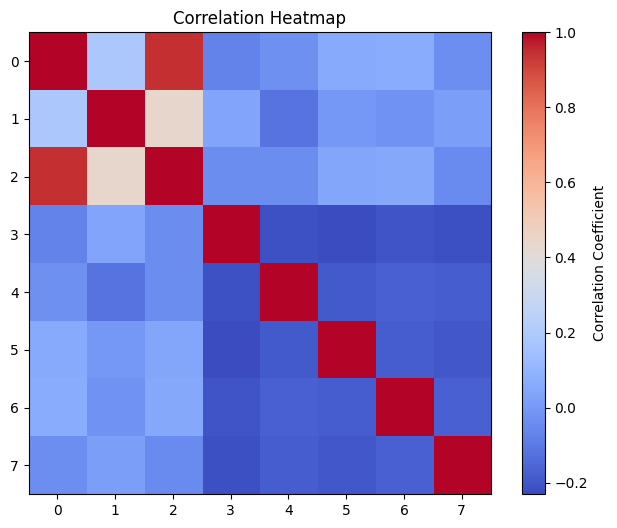

In [7]:

import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(8,6))
plt.imshow(df_encoded.corr(), cmap='coolwarm', interpolation='none')
plt.title('Correlation Heatmap')
plt.colorbar(label='Correlation Coefficient')
plt.show()
